##Deklarasi LIBARY PYTHON


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

##Dekalarasi File Gambar (JPG)

In [2]:
img_path = 'jeje.jpg'
img = Image.open(img_path)

##Convert File to RGB libary

In [3]:
img_rgb = img.convert('RGB')

img_array = np.array(img_rgb)

r_array = img_array[:, :, 0]
g_array = img_array[:, :, 1]
b_array = img_array[:, :, 2]


##deklarasi Segmentasi objek

In [4]:
threshold = 50

In [5]:
r_mask = r_array > threshold
g_mask = g_array > threshold
b_mask = b_array > threshold

## Penerapan Efek Visual

In [14]:
highlighted_dea = img_array.copy()
highlighted_enj = img_array.copy()
highlighted_eli = img_array.copy()


highlighted_dea[r_mask] = [128, 128, 128] #dea
highlighted_dea[~r_mask] = [0, 0, 0]

highlighted_enj[b_mask] = [128, 128, 128] #enj
highlighted_enj[~b_mask] = [0, 0, 0]

highlighted_eli[g_mask] = [128, 128, 128] #eli
highlighted_eli[~g_mask] = [0, 0, 0]

##Koversi array ke gambar

In [7]:
img_highlighted_dea = Image.fromarray(highlighted_dea)
img_highlighted_enj = Image.fromarray(highlighted_enj)
img_highlighted_eli = Image.fromarray(highlighted_eli)

##Menampilkan figur  dengan Matplotlib

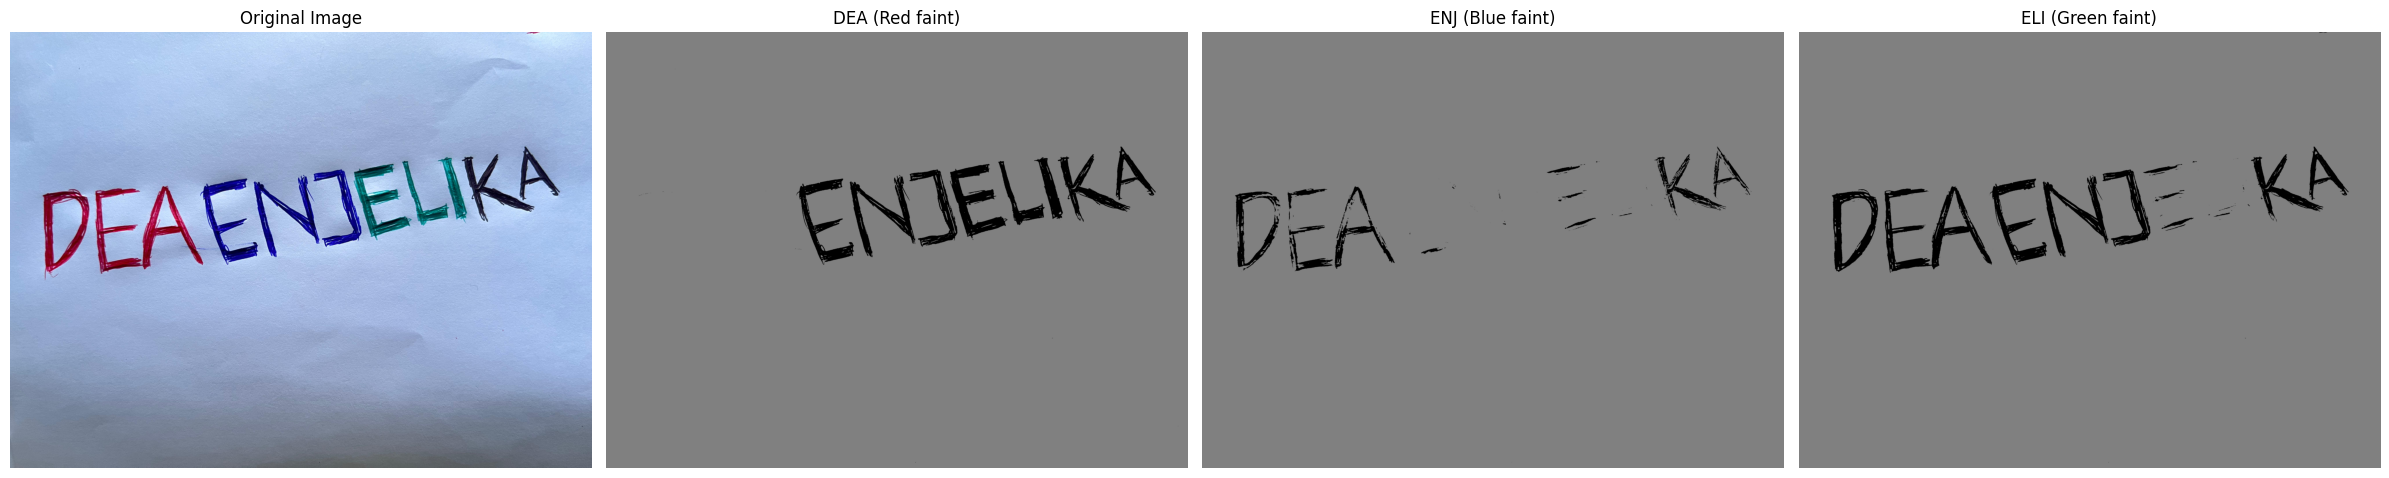

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(img_highlighted_dea)
ax[1].set_title("DEA (Red faint)")
ax[1].axis('off')

ax[2].imshow(img_highlighted_enj)
ax[2].set_title("ENJ (Blue faint)")
ax[2].axis('off')

ax[3].imshow(img_highlighted_eli)
ax[3].set_title("ELI (Green faint)")
ax[3].axis('off')

plt.tight_layout()
plt.show()

## Pembuatan Segmentasi masker warna  

In [18]:
none_mask = ~(r_mask | g_mask | b_mask)
blue_mask = b_mask & ~(r_mask | g_mask)
red_blue_mask = r_mask & b_mask & ~g_mask
red_green_blue_mask = r_mask & g_mask & b_mask

In [20]:
highlighted_none = img_array.copy()
highlighted_none[~none_mask] = [0, 0, 0]

highlighted_blue = img_array.copy()
highlighted_blue[~blue_mask] = [0, 0, 0]

highlighted_red_blue = img_array.copy()
highlighted_red_blue[~red_blue_mask] = [0, 0, 0]

highlighted_red_green_blue = img_array.copy()
highlighted_red_green_blue[~red_green_blue_mask] = [0, 0, 0]

##konversi array Numpy ke Gambar

In [21]:
img_highlighted_none = Image.fromarray(highlighted_none)
img_highlighted_blue = Image.fromarray(highlighted_blue)
img_highlighted_red_blue = Image.fromarray(highlighted_red_blue)
img_highlighted_red_green_blue = Image.fromarray(highlighted_red_green_blue)

## Menampilkan Figure dengan Matplotlib

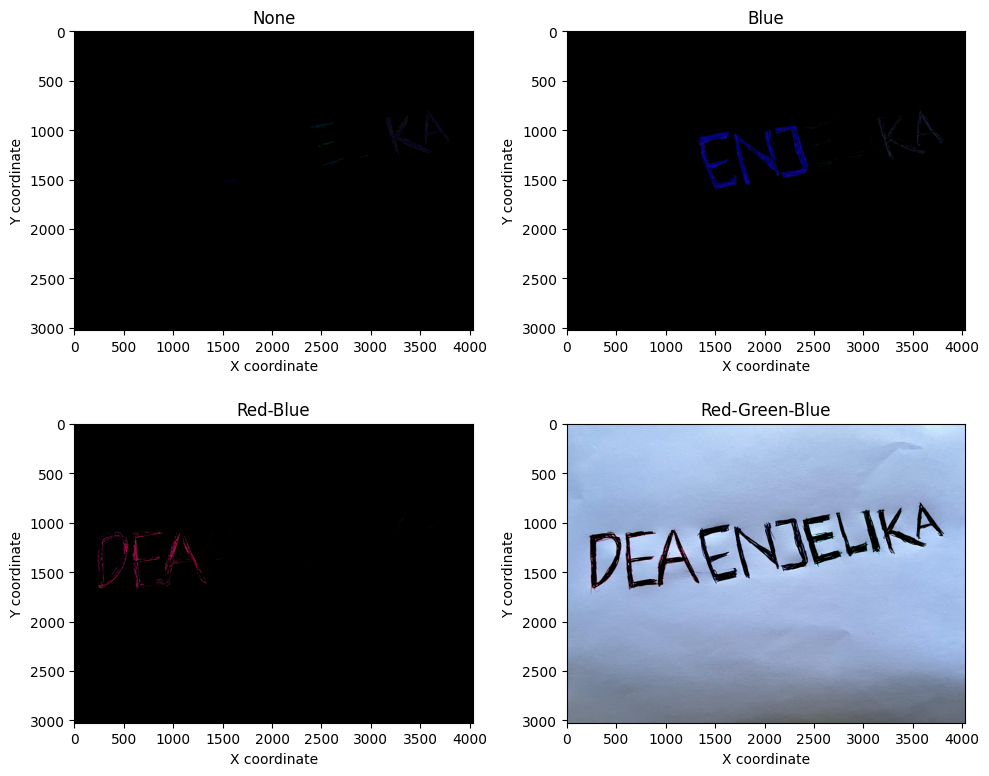

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for a in ax.flatten():
    a.set_xlabel('X coordinate')
    a.set_ylabel('Y coordinate')
    a.set_xlim(0, img_array.shape[1])  # Width of the image
    a.set_ylim(img_array.shape[0], 0)


ax[0, 0].imshow(img_highlighted_none)
ax[0, 0].set_title("None")


ax[0, 1].imshow(img_highlighted_blue)
ax[0, 1].set_title("Blue")


ax[1, 0].imshow(img_highlighted_red_blue)
ax[1, 0].set_title("Red-Blue")


ax[1, 1].imshow(img_highlighted_red_green_blue)
ax[1, 1].set_title("Red-Green-Blue")


plt.tight_layout()
plt.show()